In [5]:
from amftrack.pipeline.development.high_mag_videos.kymo_class import *
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
%matplotlib widget
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
import scipy


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
img_address = 'F:/AMOLF_Data/20221026_Plate452_22/'

test_video = Kymo_video_analysis(img_address, logging=True, vid_type="FLUO", binning=2)
edge_list = test_video.edges

print('\n To work with individual edges, here is a list of their indices:')
for i, edge in enumerate(edge_list):
    print('edge {}, {}'.format(i, edge))
    
test_video.plot_extraction_img(save_img=True)
edge_objs = test_video.edge_objects

In [ ]:
avg_thresh = 10

from itertools import compress

edge_objs = [edge_objs[0]]

for edge in edge_objs:
    edge_pic = edge.view_edge(img_frame=40 ,save_im=False)
    bounds_space = np.linspace(edge.bounds[0], edge.bounds[1], np.shape(edge_pic)[1])
    edge_max = np.average(edge_pic, axis=0)
    a = [i for i in range(len(bounds_space)) if edge_max[i] > avg_thresh]
    print(bounds_space[a[0]], bounds_space[a[-1]])
    edge.bounds = [a[0], a[-1]]
    fig, ax = plt.subplots()
    ax.plot( np.linspace(edge.bounds[0], edge.bounds[1], len(edge_max)), edge_max)


In [ ]:
bin_nr = 2
kymo = [edge.extract_multi_kymo(bin_nr) for edge in edge_objs]


In [ ]:
fig, ax = plt.subplots(len(edge_objs), bin_nr)
count = 0
for i in range(len(edge_objs)):
    for j in range(bin_nr):
        if len(edge_objs) > 1:
            ax[i][j].imshow(kymo[i][j])
        else:
            ax[j].imshow(kymo[i][j])
# plt.show()

In [ ]:
for i, edge in enumerate(edge_objs):
    huh = edge.extract_transport()
print(huh.shape)

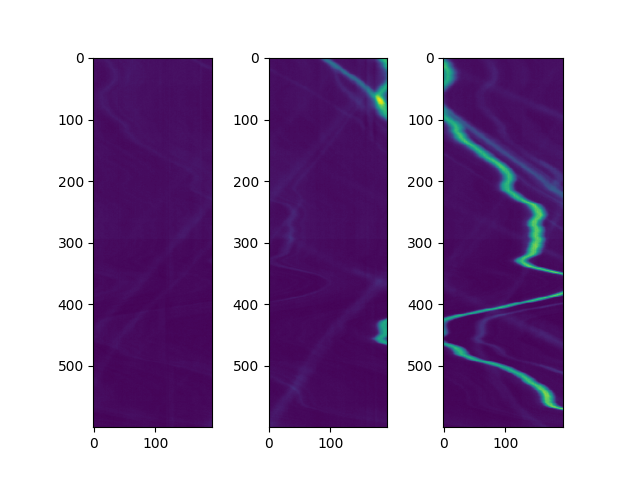

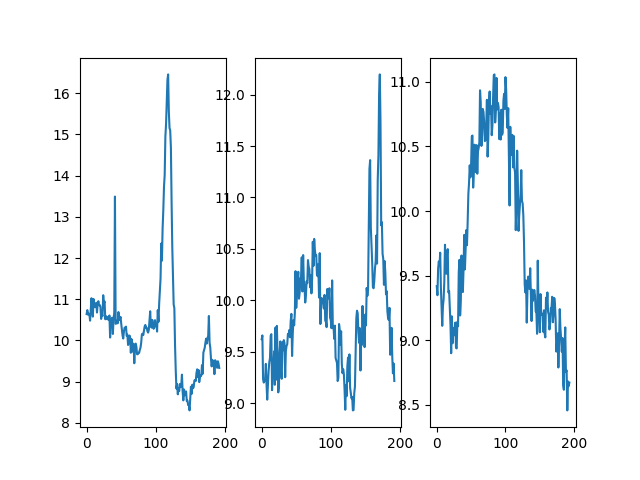

In [11]:
bins = 3
bins_space = np.linspace(0, len(kymo[0][0]), bins+1, dtype=int)
fig, ax = plt.subplots(1, bins)
fig2, ax2 = plt.subplots(1, bins)
kymo_means = np.percentile(kymo[1], .4, axis=0)
kymo_normal = kymo[1] / kymo_means
kymo_min, kymo_max = (np.min(kymo_normal), np.max(kymo_normal))
for i in range(bins):
    ax[i].plot(kymo_means[bins_space[i]:bins_space[i+1]])
    ax2[i].imshow(kymo_normal.transpose()[bins_space[i]:bins_space[i+1]].transpose(), vmin=kymo_min, vmax = kymo_max)
plt.show()

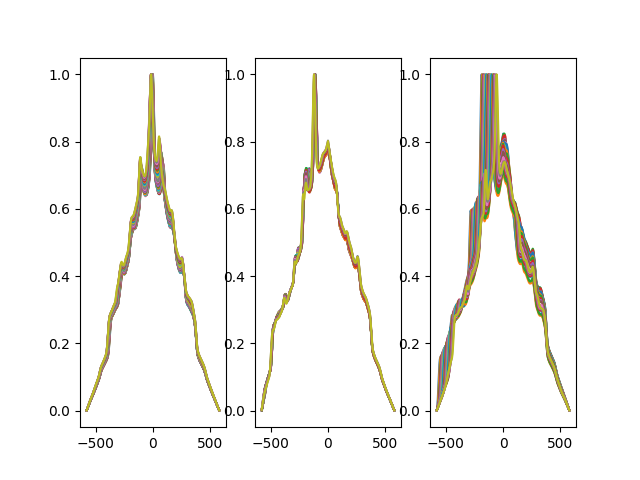

In [6]:

fig, ax = plt.subplots(1, bins)
for i in range(1, 30):
    for j in range(bins):
        corr = signal.correlate(kymo[1][0], kymo[1][bins_space[j]:bins_space[j+1]][i])
        corr /= np.max(corr)
        lags = signal.correlation_lags(len(kymo[0][0]), len(kymo[0][bins_space[j]:bins_space[j+1]][i]))
        ax[j].plot(lags, corr)
plt.show()